#This dataset provides information on the total calories in prepared foods; calories from solid fats, added sugars, and alcohol (extras); MyPyramid food group and subgroup amounts; and saturated fat content of over 1,000 commonly eaten foods with corresponding commonly used portion amounts.
https://catalog.data.gov/dataset/mypyramid-food-raw-data-f9ed6
    

In [2]:
#import libraries
import pandas as pd
import numpy as np

In [4]:
#load csv file data with headers

location = "Food_Display_Table.csv"
df = pd.read_csv(location)

In [5]:
df.head()
#df.head

,Food_Code,Display_Name,Portion_Default,Portion_Amount,Portion_Display_Name,Factor,Increment,Multiplier,Grains,Whole_Grains,...,Milk,Meats,Soy,Drybeans_Peas,Oils,Solid_Fats,Added_Sugars,Alcohol,Calories,Saturated_Fats
0,12350000,Sour cream dip,1,0.25,cup,0.25,0.25,1.00,0.04799,0.0,...,0.00000,0.0000,0.0,0.0,0.0,105.64850,1.57001,0.0,133.65,7.36898
1,13110100,"Ice cream, regular",1,1.00,cup,1.00,0.25,0.25,0.00000,0.0,...,0.29393,0.0000,0.0,0.0,0.0,130.99968,95.20488,0.0,267.33,9.03070
2,13110120,"Ice cream, rich",1,1.00,cup,1.00,0.25,0.25,0.00000,0.0,...,0.25160,0.0962,0.0,0.0,0.0,213.06672,96.10340,0.0,368.52,15.28840
3,13110200,Soft serve ice cream,1,1.00,cup,1.00,0.25,0.25,0.00000,0.0,...,0.38233,0.0000,0.0,0.0,0.0,170.39808,123.83793,0.0,347.73,11.74670
4,13120100,"Ice cream bar, chocolate covered",1,1.00,bar (bar = 3 fl oz),1.00,0.50,0.50,0.00000,0.0,...,0.09744,0.0000,0.0,0.0,0.0,112.32144,45.54761,0.0,169.12,9.58720


In [6]:
#show the column names in the dataset
df.columns

Index(['Food_Code', 'Display_Name', 'Portion_Default', 'Portion_Amount',
       'Portion_Display_Name', 'Factor', 'Increment', 'Multiplier', 'Grains',
       'Whole_Grains', 'Vegetables', 'Orange_Vegetables',
       'Drkgreen_Vegetables', 'Starchy_vegetables', 'Other_Vegetables',
       'Fruits', 'Milk', 'Meats', 'Soy', 'Drybeans_Peas', 'Oils', 'Solid_Fats',
       'Added_Sugars', 'Alcohol', 'Calories', 'Saturated_Fats'],
      dtype='object')

In [7]:
#show the data type of each column
df.dtypes

Food_Code                 int64
Display_Name             object
Portion_Default           int64
Portion_Amount          float64
Portion_Display_Name     object
Factor                  float64
Increment               float64
Multiplier              float64
Grains                  float64
Whole_Grains            float64
Vegetables              float64
Orange_Vegetables       float64
Drkgreen_Vegetables     float64
Starchy_vegetables      float64
Other_Vegetables        float64
Fruits                  float64
Milk                    float64
Meats                   float64
Soy                     float64
Drybeans_Peas           float64
Oils                    float64
Solid_Fats              float64
Added_Sugars            float64
Alcohol                 float64
Calories                float64
Saturated_Fats          float64
dtype: object

In [8]:
#number of non-NA values
df.count()

Food_Code               2014
Display_Name            2014
Portion_Default         2014
Portion_Amount          2014
Portion_Display_Name    2014
Factor                  2011
Increment               2014
Multiplier              2014
Grains                  2014
Whole_Grains            2014
Vegetables              2014
Orange_Vegetables       2014
Drkgreen_Vegetables     2014
Starchy_vegetables      2014
Other_Vegetables        2014
Fruits                  2014
Milk                    2014
Meats                   2014
Soy                     2014
Drybeans_Peas           2014
Oils                    2014
Solid_Fats              2014
Added_Sugars            2014
Alcohol                 2014
Calories                2014
Saturated_Fats          2014
dtype: int64

In [10]:
#Create a new dataframe with only the data that I want to consider 
df2 = df[["Display_Name","Portion_Amount","Factor","Increment","Multiplier","Oils","Solid_Fats","Added_Sugars","Alcohol","Calories","Saturated_Fats"]]
df2.head()


,Display_Name,Portion_Amount,Factor,Increment,Multiplier,Oils,Solid_Fats,Added_Sugars,Alcohol,Calories,Saturated_Fats
0,Sour cream dip,0.25,0.25,0.25,1.00,0.0,105.64850,1.57001,0.0,133.65,7.36898
1,"Ice cream, regular",1.00,1.00,0.25,0.25,0.0,130.99968,95.20488,0.0,267.33,9.03070
2,"Ice cream, rich",1.00,1.00,0.25,0.25,0.0,213.06672,96.10340,0.0,368.52,15.28840
3,Soft serve ice cream,1.00,1.00,0.25,0.25,0.0,170.39808,123.83793,0.0,347.73,11.74670
4,"Ice cream bar, chocolate covered",1.00,1.00,0.50,0.50,0.0,112.32144,45.54761,0.0,169.12,9.58720


In [ ]:
CORRELATION AND REGRESSION MODELS

In [11]:
#Create a correlation table to determine which variables to include in regression 
df2.corr()

,Portion_Amount,Factor,Increment,Multiplier,Oils,Solid_Fats,Added_Sugars,Alcohol,Calories,Saturated_Fats
Portion_Amount,1.000000,0.803041,0.706804,-0.359310,-0.054413,-0.034347,-0.042687,0.112408,-0.018401,-0.040976
Factor,0.803041,1.000000,0.427489,-0.345697,-0.068338,-0.033472,-0.008645,0.248259,0.021941,-0.028186
Increment,0.706804,0.427489,1.000000,0.180971,-0.112745,-0.073034,-0.094904,0.036853,-0.175976,-0.114497
Multiplier,-0.359310,-0.345697,0.180971,1.000000,-0.002380,-0.068143,-0.078872,-0.083963,-0.259103,-0.092082
Oils,-0.054413,-0.068338,-0.112745,-0.002380,1.000000,-0.023368,0.052253,-0.041677,0.278685,0.200556
Solid_Fats,-0.034347,-0.033472,-0.073034,-0.068143,-0.023368,1.000000,0.046234,-0.067832,0.745669,0.862640
Added_Sugars,-0.042687,-0.008645,-0.094904,-0.078872,0.052253,0.046234,1.000000,0.026727,0.243772,0.033698
Alcohol,0.112408,0.248259,0.036853,-0.083963,-0.041677,-0.067832,0.026727,1.000000,0.044321,-0.071465
Calories,-0.018401,0.021941,-0.175976,-0.259103,0.278685,0.745669,0.243772,0.044321,1.000000,0.797405
Saturated_Fats,-0.040976,-0.028186,-0.114497,-0.092082,0.200556,0.862640,0.033698,-0.071465,0.797405,1.000000


In [12]:
import statsmodels.formula.api as smf

In [36]:
#Run a regression on above variables, except half-bathrooms and rooms
result = smf.ols('Calories ~  Portion_Amount + Increment + Factor + Multiplier + Oils + Solid_Fats + Added_Sugars + Alcohol + Saturated_Fats ' , data=df).fit()

In [37]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Calories   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     722.1
Date:                Fri, 22 Mar 2019   Prob (F-statistic):               0.00
Time:                        22:56:06   Log-Likelihood:                -11422.
No. Observations:                2011   AIC:                         2.286e+04
Df Residuals:                    2001   BIC:                         2.292e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        130.9567      5.358     24.441      0.000     120.449     141.465
Portion_Amount    -9.8303      3.162     -3.109      0.002     -16.031      -3.630
Increment          9.1871      7.737      1.187      0.235      -5.987      24.361
Factor             4.0936      2.249      1.821      0.069      -0.316       8.503
Multiplier      -113.8351      8.997    -12.653      0.000    -131.479     -96.191
Oils              33.8133      2.085     16.216      0.000      29.724      37.903
Solid_Fats         0.9188      0.057     16.021      0.000       0.806       1.031
Added_Sugars       0.6503      0.039     16.605      0.000       0.573       0.727
Alcohol            0.5897      0.077      7.661      0.000       0.439       0.741
Saturated_Fats    18.3809      1.061     17.327      0.000      16.300      20.461
==============================================================================
Omnibus:                      521.270   Durbin-Watson:                   1.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4874.474
Skew:                           0.945   Prob(JB):                         0.00
Kurtosis:                      10.390   Cond. No.                         508.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
#Remove increment  
result = smf.ols('Calories ~  Portion_Amount + Multiplier + Factor + Oils + Solid_Fats + Added_Sugars + Alcohol + Saturated_Fats ' , data=df).fit()

In [39]:
result.summary ()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Calories   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     812.1
Date:                Fri, 22 Mar 2019   Prob (F-statistic):               0.00
Time:                        22:56:46   Log-Likelihood:                -11423.
No. Observations:                2011   AIC:                         2.286e+04
Df Residuals:                    2002   BIC:                         2.291e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        129.6077      5.237     24.749      0.000     119.337     139.878
Portion_Amount    -6.8251      1.895     -3.602      0.000     -10.541      -3.109
Multiplier      -106.7087      6.703    -15.920      0.000    -119.854     -93.564
Factor             3.1496      2.104      1.497      0.134      -0.976       7.275
Oils              33.5244      2.071     16.186      0.000      29.463      37.586
Solid_Fats         0.9198      0.057     16.038      0.000       0.807       1.032
Added_Sugars       0.6499      0.039     16.594      0.000       0.573       0.727
Alcohol            0.5938      0.077      7.721      0.000       0.443       0.745
Saturated_Fats    18.3415      1.060     17.297      0.000      16.262      20.421
==============================================================================
Omnibus:                      518.649   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4922.417
Skew:                           0.934   Prob(JB):                         0.00
Kurtosis:                      10.433   Cond. No.                         360.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
#Remove factor  
result = smf.ols('Calories ~  Portion_Amount + Multiplier + Oils + Solid_Fats + Added_Sugars + Alcohol + Saturated_Fats ' , data=df).fit()

In [42]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Calories   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     928.9
Date:                Fri, 22 Mar 2019   Prob (F-statistic):               0.00
Time:                        22:58:56   Log-Likelihood:                -11440.
No. Observations:                2014   AIC:                         2.290e+04
Df Residuals:                    2006   BIC:                         2.294e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        131.2011      5.140     25.528      0.000     121.122     141.281
Portion_Amount    -4.8128      1.158     -4.155      0.000      -7.084      -2.541
Multiplier      -107.7407      6.670    -16.154      0.000    -120.821     -94.660
Oils              33.3299      2.067     16.125      0.000      29.276      37.384
Solid_Fats         0.9155      0.057     15.989      0.000       0.803       1.028
Added_Sugars       0.6518      0.039     16.693      0.000       0.575       0.728
Alcohol            0.6250      0.074      8.413      0.000       0.479       0.771
Saturated_Fats    18.4302      1.059     17.409      0.000      16.354      20.506
==============================================================================
Omnibus:                      515.191   Durbin-Watson:                   1.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4913.756
Skew:                           0.923   Prob(JB):                         0.00
Kurtosis:                      10.426   Cond. No.                         357.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
#Remove the intercept - set coefficient to 0
result = smf.ols('Calories ~  Portion_Amount + Multiplier + Oils  + Solid_Fats + Added_Sugars + Alcohol + Saturated_Fats - 1' , data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Calories   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     1657.
Date:                Fri, 22 Mar 2019   Prob (F-statistic):               0.00
Time:                        23:01:48   Log-Likelihood:                -11723.
No. Observations:                2014   AIC:                         2.346e+04
Df Residuals:                    2007   BIC:                         2.350e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Portion_Amount    11.8885      1.100     10.808      0.000       9.731      14.046
Multiplier        42.2878      3.629     11.653      0.000      35.171      49.405
Oils              36.7254      2.374     15.472      0.000      32.070      41.381
Solid_Fats         0.9009      0.066     13.673      0.000       0.772       1.030
Added_Sugars       0.8546      0.044     19.424      0.000       0.768       0.941
Alcohol            0.7572      0.085      8.879      0.000       0.590       0.924
Saturated_Fats    22.2855      1.206     18.482      0.000      19.921      24.650
==============================================================================
Omnibus:                      325.701   Durbin-Watson:                   0.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4057.700
Skew:                           0.340   Prob(JB):                         0.00
Kurtosis:                       9.920   Cond. No.                         139.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Results: the amount of calories in a food are dependent on portion size and its multiplier, as well as the amount of oils, solid fats, added sugars, alcohol and saturated fats contained in the food.  
Oils, saturated fats, portion amount and the multiplier are the most important. 

VISUALIZATIONS

In [53]:
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

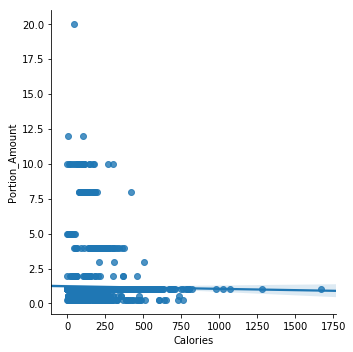

In [54]:
#make a scatterplot
sns.lmplot(x='Calories', y='Portion_Amount', data=df2)

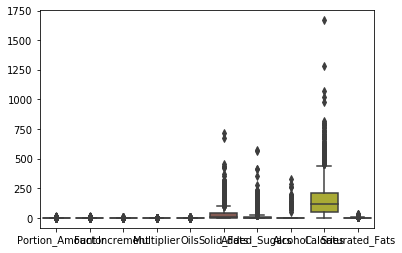

In [55]:
#boxplot showing stats for each characteristic
sns.boxplot(data=df2)

In [62]:
#create a dataframe containing the calories sources
#drop Multiplier, Factor, and Increment
stats_df3 = df2.drop(['Multiplier', 'Factor', 'Increment', 'Portion_Amount', 'Calories'], axis=1)
stats_df3.head()

,Display_Name,Oils,Solid_Fats,Added_Sugars,Alcohol,Saturated_Fats
0,Sour cream dip,0.0,105.64850,1.57001,0.0,7.36898
1,"Ice cream, regular",0.0,130.99968,95.20488,0.0,9.03070
2,"Ice cream, rich",0.0,213.06672,96.10340,0.0,15.28840
3,Soft serve ice cream,0.0,170.39808,123.83793,0.0,11.74670
4,"Ice cream bar, chocolate covered",0.0,112.32144,45.54761,0.0,9.58720


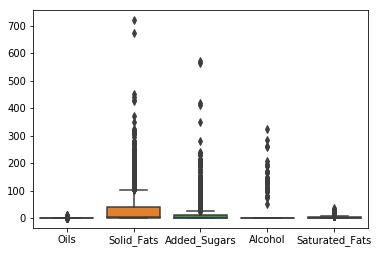

In [63]:
#boxplot for stats
sns.boxplot(data=stats_df3)

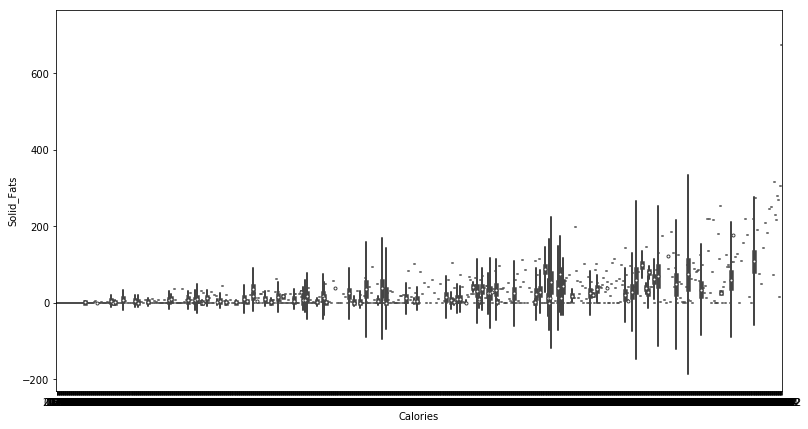

In [66]:
#change size of plot
plt.subplots(figsize=(13,7))

#violin plot shows the distribution of attack power for each type
sns.violinplot(x='Calories', y='Solid_Fats', data=df)

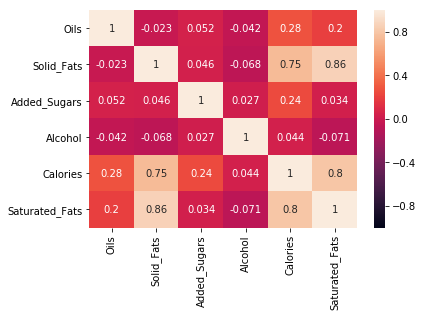

In [68]:
#show correlation of stats via heatmap
corr = stats_df2.corr()

sns.heatmap(corr, vmin=-1, annot=True)